In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
npz = np.load('/data/readout/2015-09-08-find-resonances.npz')

In [3]:
freq = npz['freq']
s21 = npz['data']

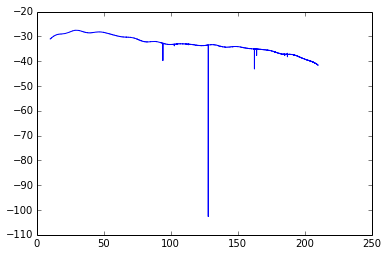

In [4]:
plot(freq,20*np.log10(np.abs(s21)))

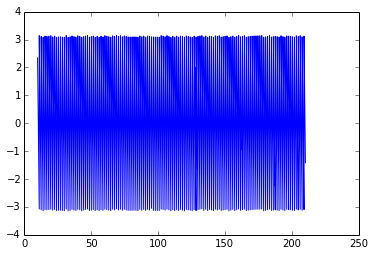

In [5]:
plot(freq,np.angle(s21))

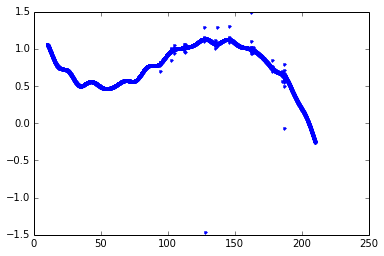

In [31]:
s21c = s21*np.exp(-1j*63.308*2*np.pi*freq)
plot(freq,np.angle(s21c),'.')
#xlim(100,110)

(-0.1, 0.1)

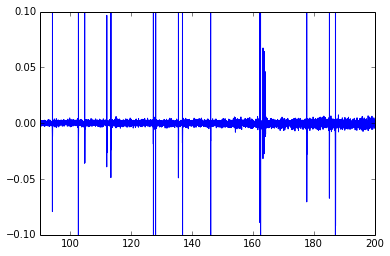

In [36]:
plot(freq[:-1],np.diff(np.angle(s21c)))
xlim(90,200)
ylim(-0.1,.1)

In [37]:
hits=np.flatnonzero(np.abs(np.diff(np.angle(s21c)))>0.05)

In [46]:
res = []
for hit in hits:
    fr = freq[hit-10:hit+10]
    s21s = s21c[hit-10:hit+10]
    res.append(fr[np.argmin(np.abs(s21s))])
res = np.array(res)
res = np.array(list(set(list(res))))
res.sort()
res = res[np.abs(res-128) >0.002]


In [47]:
res.shape

(16,)

In [48]:
res

array([  94.11132812,  102.64257812,  104.68945312,  111.95507812,
        113.31445312,  127.28320312,  135.50195312,  136.84570312,
        146.09570312,  162.25195312,  162.48632812,  163.28320312,
        163.65820312,  177.64257812,  185.11132812,  187.11132812])

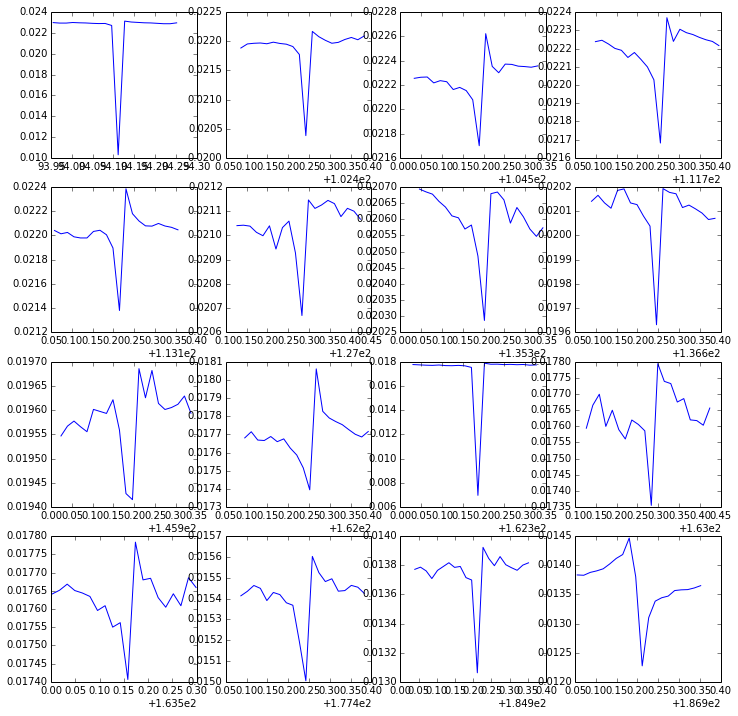

In [49]:
fig,axs = plt.subplots(4,4,figsize=(12,12))
for k in range(16):
    ax = axs.flatten()[k]
    hit = np.argmin(np.abs(freq-res[k]))
    fr = freq[hit-10:hit+10]
    s21s = s21c[hit-10:hit+10]
    ax.plot(fr,np.abs(s21s))

In [51]:
np.save('/data/readout/resonances/2015-09-08-TiN-mesh-single-open-all-resonators.npy',res)